# Monomers can give us a great deal of information about resulting polymers

In [1]:
#Import Packages

import matplotlib.pyplot as plt

import numpy as np  
import os
import glob
from os import chdir
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from os import listdir
from os.path import isfile, join
import csv
import scipy.stats
from mpl_toolkits import mplot3d
from scipy.stats import norm
from scipy.stats import mode
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
from tensorflow.keras.callbacks import ReduceLROnPlateau,ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from tensorflow import keras

%cd /Users/carlytravis/Documents/Research/PythonChem
! pip install atomman

#change to proper directory to access functions
%cd /Users/carlytravis/Documents/Research/Arola NUWC Project/kaldogroup
%pip install wget

In [3]:
path = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Monomer Properties'
chdir(path)
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]


In [4]:
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]

print(filenames)

['TableData (14).csv', 'TableData (02).csv', 'TableData (03).csv', 'TableData (15).csv', 'TableData (08).csv', 'TableData (12).csv', 'TableData (04).csv', 'TableData (05).csv', 'TableData (13).csv', 'TableData (09).csv', 'TableData (06).csv', 'TableData (10).csv', 'TableData (11).csv', 'TableData (07).csv', 'TableData (00).csv', 'TableData (16).csv', 'TableData (17).csv', 'TableData (01).csv']


In [5]:
df1 = pd.DataFrame(filenames, columns=['CSV'])
print(df1)

                   CSV
0   TableData (14).csv
1   TableData (02).csv
2   TableData (03).csv
3   TableData (15).csv
4   TableData (08).csv
5   TableData (12).csv
6   TableData (04).csv
7   TableData (05).csv
8   TableData (13).csv
9   TableData (09).csv
10  TableData (06).csv
11  TableData (10).csv
12  TableData (11).csv
13  TableData (07).csv
14  TableData (00).csv
15  TableData (16).csv
16  TableData (17).csv
17  TableData (01).csv


In [6]:
x = np.shape(df1)
rslt_df = df1.sort_values(by='CSV')
print((x))

(18, 1)


In [7]:
df1 = rslt_df.reset_index()
del df1['index']


In [8]:
df3 = pd.read_csv('TableData (00).csv', sep=';')
df3 = df3.reset_index()
df3.drop(df3.head(4).index,inplace=True)
df3.drop(df3.tail(3).index,inplace=True)
df3.drop(df3.iloc[:,8:], axis=1, inplace=True)
df3.head()
df3 = df3.rename(columns={'level_0':'category','level_1':'name','level_2':'structure',
                                        'level_3':'CAS','level_4':'mw', 'level_6':'mp','level_7':'density'})
keys = df3.keys()
print(keys)

Index(['category', 'name', 'structure', 'CAS', 'mw', 'level_5', 'mp',
       'density'],
      dtype='object')


In [9]:
frames = df3
type(frames)

pandas.core.frame.DataFrame

In [10]:
#combine all files in the list

for i in range(0,17): #iterate through datasets
    #read each file in list
    df2 = pd.read_csv(df1.iloc[i,0], sep=';')
    #reset index
    df2 = df2.reset_index()
    #drop non-data rows
    df2.drop(df2.head(4).index,inplace=True)
    df2.drop(df2.tail(3).index,inplace=True)
    df2.drop(df2.iloc[:,8:], axis=1, inplace=True)
    #set column names
    df2 = df2.rename(columns={'level_0':'category','level_1':'name','level_2':'structure',
                                        'level_3':'CAS','level_4':'mw', 'level_6':'mp',
                              'level_7':'density'})
    #merge datasets into one for better analysis
    frames = [frames, df2]
    frames = pd.concat(frames, axis=0, ignore_index=True)

frames.head()

,category,name,structure,CAS,mw,level_5,mp,density
0,acetylene,acetylene,H2C≡CH2,74-86-2,26.04,-82,-84(s),1
1,acetylene,chloroacetylene,ClC≡CH,NaN,60.48,-32,-126,NaN
2,acetylene,dichloroacetylene,ClC≡CCl,NaN,94.93,NaN,-66,NaN
3,acetylene,diphenylacetylene,C6H5C≡CC6H5,501-65-5,178.23,60,8.9473684210526E+14/100000000000000,0.99
4,acetylene,phenylacetylene,HC≡CC6H5,NaN,102.14,143,NaN,0.929


In [11]:
#This defines dataframe

del frames['level_5']
#remove polymer NaN values
df_d = frames.dropna(subset=['CAS'])
df_d.head()


#count instances
df_d['CAS'].apply(type).value_counts()


<class 'str'>    800
Name: CAS, dtype: int64

In [16]:
#Remove useless characters for mw
#rid of commas
this3 = df_d[df_d['mw'].str.contains('ca. ')]
this3.index[this3['mw']].tolist()
df_copy = df_d
df_copy.loc[index3,'mw'] = this3
print(index3)

[]

In [14]:
df_copy.head()

,category,name,structure,CAS,mw,mp,density
0,acetylene,acetylene,H2C≡CH2,74-86-2,26.04,-84(s),1
3,acetylene,diphenylacetylene,C6H5C≡CC6H5,501-65-5,178.23,8.9473684210526E+14/100000000000000,0.99
5,acid dichloride,adipoyl chloride,ClC(O)(CH2)4C(O)Cl,111-50-2,183.03,NaN,1.259
6,acid dichloride,azelaoyl chloride,ClC(O)(CH2)7C(O)Cl,123-98-8,255.12,NaN,1.143
7,acid dichloride,diethylmanoyl chloride,ClC(O)C(CH2CH3)2C(O)Cl,54505-72-5,197.06,NaN,1.145


In [17]:
#change mw to numeric
df_copy['mw'] = df_copy['mw'].astype('float')


/var/folders/ch/g3s490l17b78nnf3_r0mjqrw0000gn/T/ipykernel_3614/3961438142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_copy['mw'] = df_copy['mw'].astype('float')


In [18]:
#Extract CAS Numbers
df_mw = df_copy['mw']
cas_num = df_d['CAS']
result = pd.concat([df_mw, cas_num, df_d['category']], axis=1)
result.head()

,mw,CAS,category
0,26.04,74-86-2,acetylene
3,178.23,501-65-5,acetylene
5,183.03,111-50-2,acid dichloride
6,255.12,123-98-8,acid dichloride
7,197.06,54505-72-5,acid dichloride


In [20]:
df_copy.to_csv(r'/Users/carlytravis/Documents/Research/Arola NUWC Project/Monomer Properties/MonomerCompiled_08_21.csv',index = False, header=True)
df_copy.describe()

,mw
count,800.000000
mean,176.097400
std,82.979668
min,26.040000
25%,126.160000
50%,162.165000
75%,203.065000
max,586.170000


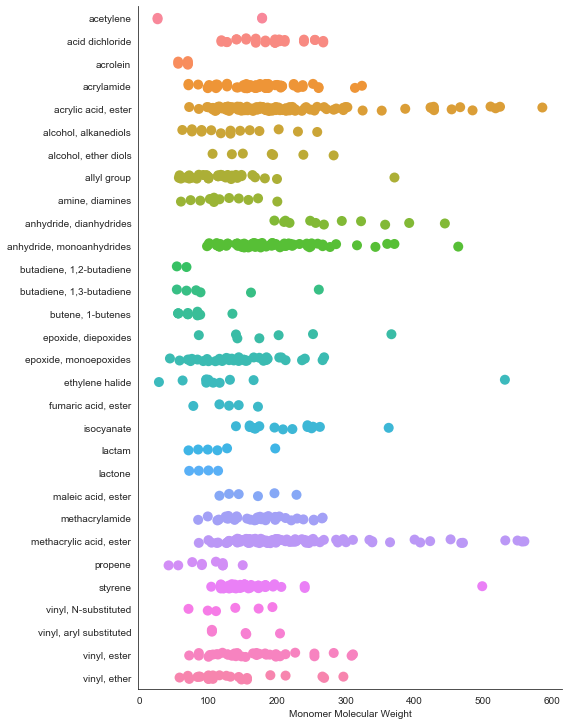

In [15]:
#Visualize Chemical Space
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style ='white')
# Generate some category data
g = sns.catplot(x='mw', y='category', data = result, height = 10, aspect = .8, s=10)
g.set_axis_labels("Monomer Molecular Weight", "")
plt.show()


## Using ASE to find monomer structures

Iterate through CAS Numbers and extract information

In [18]:
%pwd

'/Users/carlytravis/Documents/Research/Arola NUWC Project/Monomer Properties'

In [4]:
from ase.build import molecule
from ase.calculators.lammpslib import LAMMPSlib
from kaldo.forceconstants import ForceConstants
from ase import Atoms
from ase import Atom
from ase.build import molecule
from ase.data.g2 import get_atomization_energy
from ase.build import bulk
from ase.calculators.lammpsrun import LAMMPS
from ase.collections import g2
from ase.build import molecule
from ase.data.pubchem import pubchem_atoms_search, pubchem_atoms_conformer_search
from ase.data import atomic_numbers, atomic_names, atomic_masses, covalent_radii
from ase.data import atomic_masses_legacy
import numpy as np

In [5]:
#Water Molecule
from ase.visualize import view
from ase.io import write
water = molecule('H2O')
view(water, viewer='x3d')

In [6]:
from ase.io import write
from ase.io.pov import get_bondpairs, set_high_bondorder_pairs
from ase.io import read, write
from ase.data.pubchem import pubchem_atoms_search, pubchem_search, pubchem_atoms_conformer_search
monomerall = pubchem_search('501-65-5')
(dir(monomerall))


['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'atoms',
 'data',
 'get_atoms',
 'get_pubchem_data']

In [1]:
#PPS Monomer
monomer = pubchem_atoms_search('501-65-5')
view(monomer, viewer='x3d')

NameError: name 'pubchem_atoms_search' is not defined

ASE Calculations https://wiki.fysik.dtu.dk/ase/ase/atoms.html#ase.Atoms.get_calculator

In [8]:
from ase.calculators.acemolecule import ACE
from ase.units import kcal,mol
from ase.geometry import wrap_positions
from ase.geometry.analysis import Analysis
#monomer.set_cell()
#monomer_charge = monomer.get_charges()
monomer_form = monomer.get_chemical_formula()
monomer_incharge = monomer.get_initial_charges()
monomer_mass = monomer.get_masses()
monomer_pos = monomer.get_positions(wrap=True)
monomer_atomic = monomer.get_atomic_numbers()
monomer_symbols = monomer.get_chemical_symbols()
monomer_mass = monomer.get_masses()
#monomer_cell = monomer.get_reciprocal_cell()
monomer_center = monomer.get_center_of_mass()

# Pymatgen Monomer-Polymer Builder

2D structure of polymer with end groups "*"

RDKIT: https://www.rdkit.org/docs/GettingStartedInPython.html
OPENBABEL: http://hjkgrp.mit.edu/content/geometries-strings-smiles-and-openbabel

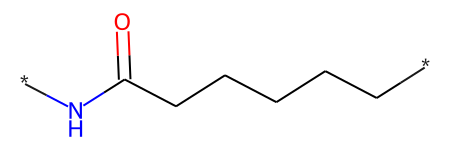

In [9]:
import os
import rdkit
from rdkit.Chem import AllChem

from rdkit.Chem import rdmolfiles
#rdkit.Chem.rdmolfiles.AtomFromSmiles('C1NCN1')
mol = rdkit.Chem.MolFromSmiles('*CCCCCC(=O)N*')
mol

## CAS Data Import

In [10]:
#import CAS numbers and convert to SMILES from dataset
path = '/Users/carlytravis/Documents/Research/Arola NUWC Project/Polymers/CAS Numbers'
chdir(path)
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
extension = 'csv'
filenames = [i for i in glob.glob('*.{}'.format(extension))]
df1 = pd.DataFrame(filenames, columns=['CSV'])
print(df1)
x = np.shape(df1)
rslt_df = df1.sort_values(by='CSV')
print((x))
df1 = rslt_df.reset_index()
del df1['index']
df3 = pd.read_csv('TableData (00).csv', sep=';')
df3 = df3.reset_index()
df3.drop(df3.head(4).index,inplace=True)
df3.drop(df3.tail(3).index,inplace=True)
df3.drop(df3.iloc[:,3:], axis=1, inplace=True)
df3.head()
df3 = df3.rename(columns={'level_0':'common name', 'level_1':'synonyms', 'level_2':'CAS'})
keys = df3.keys()
print(keys)
frames = df3
frames.head()

                   CSV
0   TableData (02).csv
1   TableData (03).csv
2   TableData (08).csv
3   TableData (04).csv
4   TableData (05).csv
5   TableData (09).csv
6   TableData (06).csv
7   TableData (10).csv
8   TableData (07).csv
9   TableData (00).csv
10  TableData (01).csv
(11, 1)
Index(['common name', 'synonyms', 'CAS'], dtype='object')


,common name,synonyms,CAS
4,Alginic acid,NaN,9005-32-7
5,"Alginic acid, sodium salt",NaN,9005-38-3
6,Bayberry wax,Myrtle wax,8038-77-5
7,"Beeswax, refined, yellow",NaN,8012-89-3
8,Boron nitride,NaN,10043-11-5


In [11]:
#combine all files in the list

for i in range(0,11): #iterate through datasets
    #read each file in list
    df2 = pd.read_csv(df1.iloc[i,0], sep=';', dtype={'mp': str})
    #reset index
    df2 = df2.reset_index()
    #drop non-data rows
    df2.drop(df2.head(4).index,inplace=True)
    df2.drop(df2.tail(3).index,inplace=True)
    df2.drop(df2.iloc[:,4:], axis=1, inplace=True)
    #set column names
    df2 = df2.rename(columns={'level_0':'common name', 
                              'level_1':'synonyms', 'level_2':'CAS'})
    #merge datasets into one for better analysis
    frames = [frames, df2]
    frames = pd.concat(frames, axis=0, ignore_index=True)

frames.head()

,common name,synonyms,CAS,level_3
0,Alginic acid,NaN,9005-32-7,NaN
1,"Alginic acid, sodium salt",NaN,9005-38-3,NaN
2,Bayberry wax,Myrtle wax,8038-77-5,NaN
3,"Beeswax, refined, yellow",NaN,8012-89-3,NaN
4,Boron nitride,NaN,10043-11-5,NaN


In [12]:
#This defines dataframe

#remove polymer NaN values
df_d = frames.dropna(subset=['CAS'])
df_d.head()

#count instances
df_d['CAS'].apply(type).value_counts()

<class 'str'>    576
Name: CAS, dtype: int64

In [34]:
#for row in df_d.rows:
from pymatgen.core.structure import Molecule
from pymatgen.analysis.graphs import MoleculeGraph
from monty.dev import requires
from pymatgen.io.babel import BabelMolAdaptor
from openbabel import _openbabel
from openbabel import openbabel as ob
from openbabel import pybel as pb

In [35]:
import sys
print(sys.path)

['/Users/carlytravis/Documents/Research/Arola NUWC Project/Monomer Properties', '/Users/carlytravis/opt/anaconda3/lib/python38.zip', '/Users/carlytravis/opt/anaconda3/lib/python3.8', '/Users/carlytravis/opt/anaconda3/lib/python3.8/lib-dynload', '', '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages', '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/aeosa', '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/locket-0.2.1-py3.8.egg', '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions', '/Users/carlytravis/.ipython']


In [36]:
from pymatgen.core import Molecule
mol = Molecule(monomer_symbols, monomer_pos)
print(mol)

Full Formula (H10 C14)
Reduced Formula: H5C7
Charge = 0.0, Spin Mult = 1
Sites (24)
0 C     2.031700    -0.000100     0.000000
1 C    -2.030500    -0.000200    -0.000100
2 C     2.727900    -0.890900     0.815800
3 C    -2.727900     0.891000     0.815600
4 C     2.727600     0.890900    -0.816000
5 C    -2.728100    -0.891200    -0.815800
6 C     4.122700    -0.890600     0.816000
7 C    -4.122700     0.891200     0.815800
8 C     4.122500     0.891000    -0.815800
9 C    -4.123000    -0.890800    -0.815600
10 C     4.820000     0.000200     0.000100
11 C    -4.820200     0.000300     0.000200
12 C     0.601400    -0.000300    -0.000100
13 C    -0.601500    -0.000400    -0.000100
14 H     2.198500    -1.591400     1.457300
15 H    -2.198400     1.591600     1.457000
16 H     2.198100     1.591200    -1.457400
17 H    -2.199000    -1.591900    -1.457200
18 H     4.666000    -1.584100     1.451200
19 H    -4.665700     1.585000     1.451000
20 H     4.665700     1.584600    -1.451000
21

In [41]:
import warnings
import copy
from pymatgen.core.structure import Molecule
from pymatgen.analysis.graphs import MoleculeGraph
from monty.dev import requires
from pymatgen.io.babel import BabelMolAdaptor
from openbabel import openbabel
from openbabel import openbabel as ob
from openbabel import pybel as pb
import pybel as pb
a = BabelMolAdaptor(mol)
# Create a pybel.Molecule, which simplifies a lot of access
pm = pb.Molecule(a.openbabel_mol)
# Print canonical SMILES representation (unique and comparable).
print("Canonical SMILES = {}".format(pm.write("can")))
monomersmi = "Canonical SMILES = {}".format(pm.write("can"))

FileNotFoundError: [Errno 2] No such file or directory: '/Users/carlytravis/opt/anaconda3/lib/python3.8/site-packages/tqdm-4.59.0.dist-info/METADATA'

In [ ]:
# Generating monomer (SMILES obtained above)
# And displaying the svg.
ec = pb.readstring("smi", monomersmi)
ec.make3D()
from IPython.core.display import SVG, display_svg
svg = SVG(ec.write("svg"))
display_svg(svg)

In [ ]:
from pymatgen.analysis.chemenv.coordination_environments.coordination_geometry_finder import LocalGeometryFinder
import logging
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.chemenv.coordination_environments.chemenv_strategies import SimplestChemenvStrategy, MultiWeightsChemenvStrategy
from pymatgen.analysis.chemenv.coordination_environments.structure_environments import LightStructureEnvironments

In [ ]:
import sys
print(sys.path)

In [ ]:
! which jupyter

In [ ]:
! jupyter kernelspec list